Energy prediction project

1. Import Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xgboost import XGBRegressor


2. Load and Prepare Data

In [14]:

# Load data
train_data = pd.read_csv('/home/ahmed/Documents/GitHub/Energy-prediction-IOT/Data set/training.csv')
test_data = pd.read_csv('/home/ahmed/Documents/GitHub/Energy-prediction-IOT/Data set/testing.csv')

# Drop irrelevant features
train_data = train_data.drop(columns=['rv1', 'rv2'])
test_data = test_data.drop(columns=['rv1', 'rv2'])

# Separate features and target variable
X_train = train_data.drop(columns=['Appliances'])
y_train = train_data['Appliances']
X_test = test_data.drop(columns=['Appliances'])
y_test = test_data['Appliances']

# Define categorical and numerical features
categorical_features = ['WeekStatus', 'Day_of_week']
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


3. Feature Selection 

In [15]:

# Initialize RFE with RandomForestRegressor
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=20)
rfe.fit(X_train_preprocessed, y_train)

# Get selected features
# Since ColumnTransformer and OneHotEncoder change feature names, we need to use the transformed feature names
feature_names = np.array(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out())
all_feature_names = np.concatenate([numerical_features, feature_names])
selected_features = all_feature_names[rfe.support_]

print("Selected Features:", selected_features)


Selected Features: ['RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6' 'RH_6' 'T7'
 'RH_7' 'T8' 'RH_8' 'RH_9' 'Press_mm_hg' 'RH_out' 'Tdewpoint' 'NSM']


4.Model Training

Gradient Boosting Machine (GBM)

In [16]:
gbm = XGBRegressor(objective='reg:squarederror')
gbm.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_gbm_train = gbm.predict(X_train_preprocessed)
y_pred_gbm_test = gbm.predict(X_test_preprocessed)

# Evaluate GBM model
print("GBM Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_gbm_train)))
print("GBM Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbm_test)))
print("GBM Train MAPE:", mean_absolute_percentage_error(y_train, y_pred_gbm_train))
print("GBM Test MAPE:", mean_absolute_percentage_error(y_test, y_pred_gbm_test))
print("GBM Train R2:", r2_score(y_train, y_pred_gbm_train))
print("GBM Test R2:", r2_score(y_test, y_pred_gbm_test))

GBM Train RMSE: 37.86470821427794
GBM Test RMSE: 70.54900319960316
GBM Train MAPE: 0.2549763029219075
GBM Test MAPE: 0.36068242470718903
GBM Train R2: 0.864395022392273
GBM Test R2: 0.5178725719451904


Linear Model


In [17]:
# Initialize and train Linear Regression model
lm = LinearRegression()
lm.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_lm_train = lm.predict(X_train_preprocessed)
y_pred_lm_test = lm.predict(X_test_preprocessed)

# Evaluate Linear Regression model
print("Linear Model Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_lm_train)))
print("Linear Model Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lm_test)))
print("Linear Model Train MAPE:", mean_absolute_percentage_error(y_train, y_pred_lm_train))
print("Linear Model Test MAPE:", mean_absolute_percentage_error(y_test, y_pred_lm_test))
print("Linear Model Train R2:", r2_score(y_train, y_pred_lm_train))
print("Linear Model Test R2:", r2_score(y_test, y_pred_lm_test))


Linear Model Train RMSE: 93.20819461631554
Linear Model Test RMSE: 93.1764128000508
Linear Model Train MAPE: 0.6132175182531568
Linear Model Test MAPE: 0.5993685157193327
Linear Model Train R2: 0.17829753326627873
Linear Model Test R2: 0.15900751527969192


Support Vector Machine (SVM)


In [18]:
# Initialize and train SVM model
svm = SVR(kernel='rbf')
svm.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_svm_train = svm.predict(X_train_preprocessed)
y_pred_svm_test = svm.predict(X_test_preprocessed)

# Evaluate SVM model
print("SVM Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_svm_train)))
print("SVM Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svm_test)))
print("SVM Train MAPE:", mean_absolute_percentage_error(y_train, y_pred_svm_train))
print("SVM Test MAPE:", mean_absolute_percentage_error(y_test, y_pred_svm_test))
print("SVM Train R2:", r2_score(y_train, y_pred_svm_train))
print("SVM Test R2:", r2_score(y_test, y_pred_svm_test))


SVM Train RMSE: 101.09416618717876
SVM Test RMSE: 100.13344341342143
SVM Train MAPE: 0.3125108943317361
SVM Test MAPE: 0.3072835901939126
SVM Train R2: 0.03337374324688802
SVM Test R2: 0.028733423527388946


Random Forest

In [19]:
# Initialize and train Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_rf_train = rf.predict(X_train_preprocessed)
y_pred_rf_test = rf.predict(X_test_preprocessed)

# Evaluate Random Forest model
print("Random Forest Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print("Random Forest Train MAPE:", mean_absolute_percentage_error(y_train, y_pred_rf_train))
print("Random Forest Test MAPE:", mean_absolute_percentage_error(y_test, y_pred_rf_test))
print("Random Forest Train R2:", r2_score(y_train, y_pred_rf_train))
print("Random Forest Test R2:", r2_score(y_test, y_pred_rf_test))

Random Forest Train RMSE: 25.56073471605387
Random Forest Test RMSE: 68.94578163272415
Random Forest Train MAPE: 0.11850295101071683
Random Forest Test MAPE: 0.31404116972071394
Random Forest Train R2: 0.9382050386958679
Random Forest Test R2: 0.539536149472819


5. Feature Importance

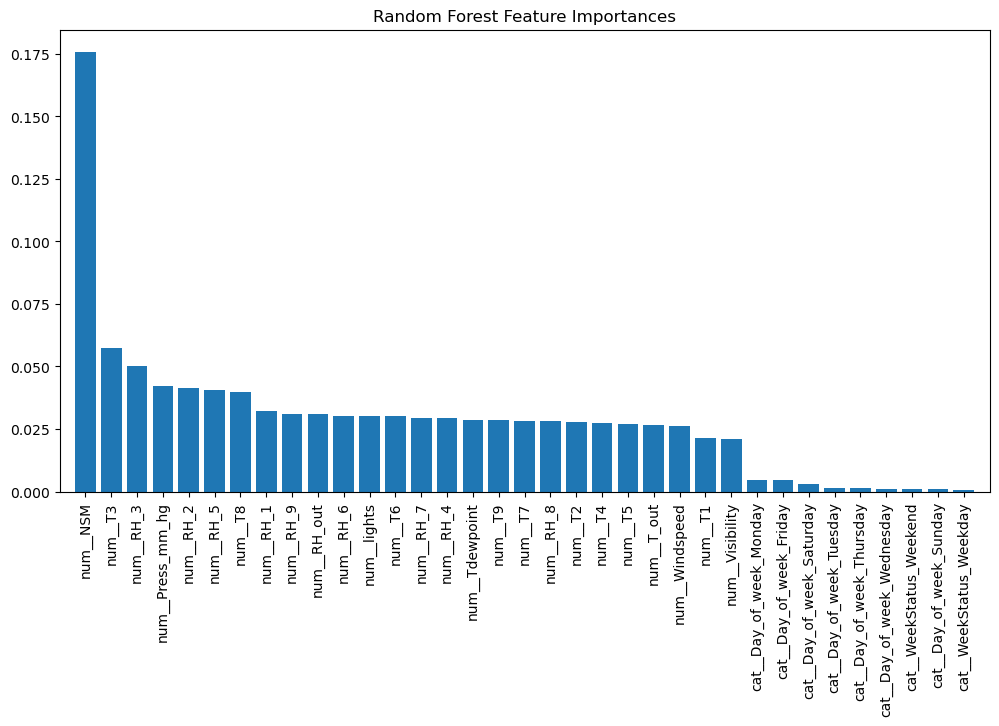

In [20]:
feature_names = preprocessor.get_feature_names_out()

# Random Forest feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train_preprocessed.shape[1]), importances[indices])
plt.xticks(range(X_train_preprocessed.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train_preprocessed.shape[1]])
plt.show()

6. Visualization and Comparison


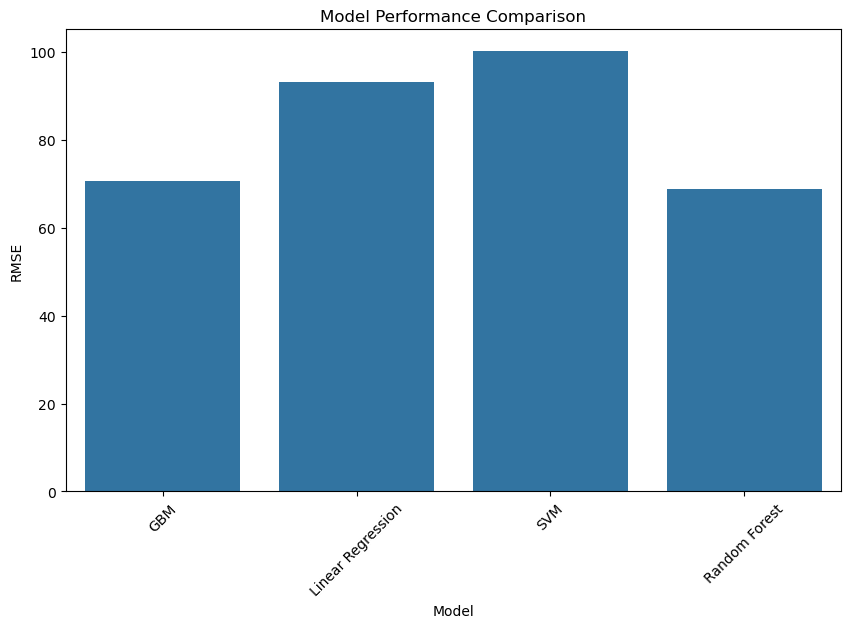

In [21]:
# Plotting the model performance metrics
def plot_metrics(metrics):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='RMSE', data=metrics)
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.show()

metrics = pd.DataFrame({
    'Model': ['GBM', 'Linear Regression', 'SVM', 'Random Forest'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_gbm_test)),
             np.sqrt(mean_squared_error(y_test, y_pred_lm_test)),
             np.sqrt(mean_squared_error(y_test, y_pred_svm_test)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf_test))]
})

plot_metrics(metrics)


In [23]:
import joblib

joblib.dump(gbm, 'gbm_model.pkl')
joblib.dump(lm, 'linear_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']